## Overview of Preprocessing

Original Annotaion Format:

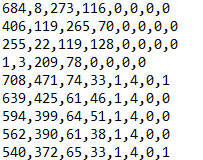

We convert this to PASCAL format, which is a standard format for bounding boxes

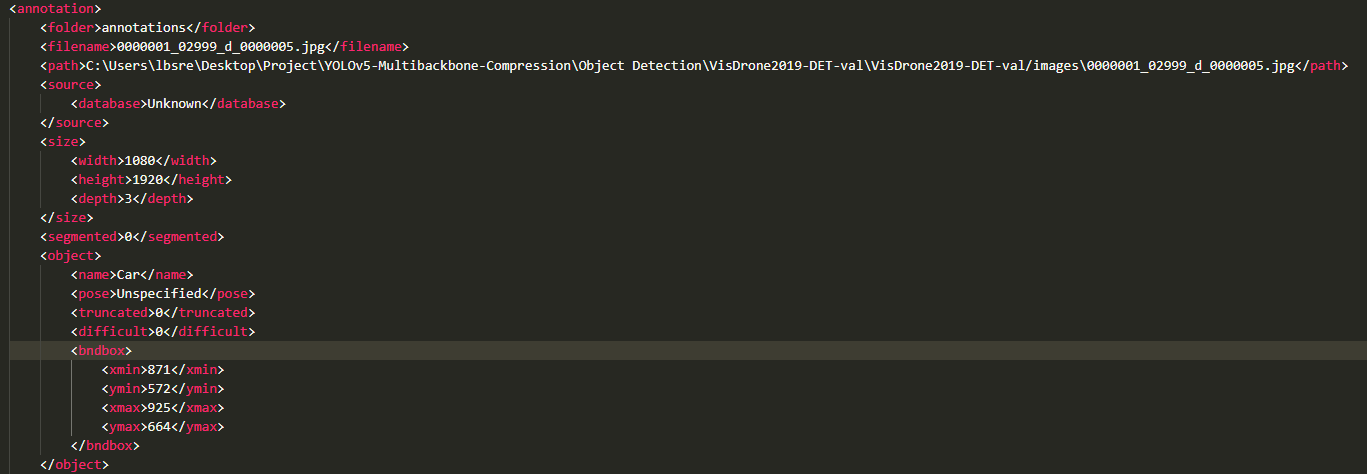

We then convert PASCAL format to YOLO format

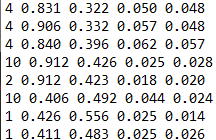

## Cloning YOLOv5 Repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/cv516Buaa/tph-yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14041, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 14041 (delta 36), reused 53 (delta 34), pack-reused 13982
Receiving objects: 100% (14041/14041), 13.24 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (9690/9690), done.
Cloning into 'tph-yolov5'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 196 (delta 4), reused 4 (delta 2), pack-reused 187
Receiving objects: 100% (196/196), 5.21 MiB | 15.41 MiB/s, done.
Resolving deltas: 100% (78/78), done.


## Installing all the requried lib's

In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 


Original annotaions:-

 bbox_left>	     The x coordinate of the top-left corner of the predicted bounding box

 bbox_top>	     The y coordinate of the top-left corner of the predicted object bounding box

 bbox_width>	     The width in pixels of the predicted object bounding box

bbox_height>	     The height in pixels of the predicted object bounding box

   score>	     The score in the DETECTION file indicates the confidence of the predicted bounding box enclosing 
                     an object instance.
                     The score in GROUNDTRUTH file is set to 1 or 0. 1 indicates the bounding box is considered in evaluation, 
                     while 0 indicates the bounding box will be ignored.
                      
object_category>    The object category indicates the type of annotated object, (i.e., ignored regions(0), pedestrian(1), 
                     people(2), bicycle(3), car(4), van(5), truck(6), tricycle(7), awning-tricycle(8), bus(9), motor(10), 
                     others(11))
                      
truncation>	     The score in the DETECTION result file should be set to the constant -1.
                     The score in the GROUNDTRUTH file indicates the degree of object parts appears outside a frame 
                     (i.e., no truncation = 0 (truncation ratio 0%), and partial truncation = 1 (truncation ratio 1% ~ 50%)).
                      
occlusion>	     The score in the DETECTION file should be set to the constant -1.
                     The score in the GROUNDTRUTH file indicates the fraction of objects being occluded (i.e., no occlusion = 0 
                     (occlusion ratio 0%), partial occlusion = 1 (occlusion ratio 1% ~ 50%), and heavy occlusion = 2 
                     (occlusion ratio 50% ~ 100%)).

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

**The original annotations have nine classes, but yolov5 only requires five (class ID,4 coordinates).**

**So we need to convert the actual txt file to xml format, and then it has the 5 components we require, but the class is not mapped; we map classes to their ids to obtain the input format for the YOLOv5.**







## Creating XML files from txt annotations
The following script was run locally to convert annotations from a custom format to the standard PASCAL format

In [ ]:
# import cv2
# import os
# import numpy as np


# input_img_folder = 'VisDrone2019-DET-train/images'
# input_ann_folder = 'VisDrone2019-DET-train/annotations'
# output_ann_folder = 'VisDrone2019-DET-train/annotations_new'
# output_img_folder = 'VisDrone2019-DET-train/images_new'

# os.makedirs(output_img_folder, exist_ok=True)
# os.makedirs(output_ann_folder, exist_ok=True)


# image_list = os.listdir(input_img_folder)
# annotation_list = os.listdir(input_ann_folder)

# label_dict = {
# 	"0" : "Ignore",
# 	"1" : "Pedestrian",
# 	"2" : "People",
# 	"3" : "Bicycle",
# 	"4" : "Car",
# 	"5" : "Van",
# 	"6" : "Truck",
# 	"7" : "Tricycle",
# 	"8" : "Awning-tricycle",
# 	"9" : "Bus",
# 	"10" : "Motor",
# 	"11" : "Others"
# }

# thickness = 2
# color = (255,0,0)
# count = 0

# def object_string(label, bbox):
# 	req_str = '''
# 	<object>
# 		<name>{}</name>
# 		<pose>Unspecified</pose>
# 		<truncated>0</truncated>
# 		<difficult>0</difficult>
# 		<bndbox>
# 			<xmin>{}</xmin>
# 			<ymin>{}</ymin>
# 			<xmax>{}</xmax>
# 			<ymax>{}</ymax>
# 		</bndbox>
# 	</object>
# 	'''.format(label, bbox[0], bbox[1], bbox[2], bbox[3])
# 	return req_str

# for annotation in annotation_list:
# 	annotation_path = os.path.join(os.getcwd(), input_ann_folder, annotation)
# 	xml_annotation = annotation.split('.txt')[0] + '.xml'
# 	xml_path = os.path.join(os.getcwd(), output_ann_folder, xml_annotation)
# 	img_file = annotation.split('.txt')[0] + '.jpg'
# 	img_path = os.path.join(os.getcwd(), input_img_folder, img_file)
# 	output_img_path = os.path.join(os.getcwd(), output_img_folder, img_file)
# 	img = cv2.imread(img_path)
# 	annotation_string_init = '''
# <annotation>
# 	<folder>annotations</folder>
# 	<filename>{}</filename>
# 	<path>{}</path>
# 	<source>
# 		<database>Unknown</database>
# 	</source>
# 	<size>
# 		<width>{}</width>
# 		<height>{}</height>
# 		<depth>{}</depth>
# 	</size>
# 	<segmented>0</segmented>'''.format(img_file, img_path, img.shape[0], img.shape[1], img.shape[2])

# 	file = open(annotation_path, 'r')
# 	lines = file.readlines()
# 	for line in lines:
# 		new_line = line.strip('\n').split(',')
# 		new_coords_min = (int(new_line[0]), int(new_line[1]))
# 		new_coords_max = (int(new_line[0])+int(new_line[2]), int(new_line[1])+int(new_line[3]))
# 		bbox = (int(new_line[0]), int(new_line[1]), int(new_line[0])+int(new_line[2]), int(new_line[1])+int(new_line[3]))
# 		label = label_dict.get(new_line[5])
# 		req_str = object_string(label, bbox)
# 		annotation_string_init = annotation_string_init + req_str
# 		#cv2.rectangle(img, new_coords_min, new_coords_max, color, thickness)
# 	cv2.imwrite(output_img_path, img)
# 	annotation_string_final = annotation_string_init + '</annotation>'
# 	f = open(xml_path, 'w')
# 	f.write(annotation_string_final)
# 	f.close()
# 	count += 1
# 	print('[INFO] Completed {} image(s) and annotation(s) pair'.format(count))

## Checking the .xml files

In [ ]:
!cat /content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-val/annotations/0000001_02999_d_0000005.xml


<annotation>
	<folder>annotations</folder>
	<filename>0000001_02999_d_0000005.jpg</filename>
	<path>C:\Users\lbsre\Desktop\Project\YOLOv5-Multibackbone-Compression\Object Detection\VisDrone2019-DET-val\VisDrone2019-DET-val/images\0000001_02999_d_0000005.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1080</width>
		<height>1920</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>Car</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>871</xmin>
			<ymin>572</ymin>
			<xmax>925</xmax>
			<ymax>664</ymax>
		</bndbox>
	</object>
	
	<object>
		<name>Car</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>948</xmin>
			<ymin>592</ymin>
			<xmax>1010</xmax>
			<ymax>684</ymax>
		</bndbox>
	</object>
	
	<object>
		<name>Car</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>


## Function to get the data from XML Annotation

In [ ]:

def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [ ]:
info_dict=extract_info_from_xml('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-val/annotations/0000001_02999_d_0000005.xml')
info_dict

{'bboxes': [{'class': 'Car',
   'xmin': 871,
   'ymin': 572,
   'xmax': 925,
   'ymax': 664},
  {'class': 'Car', 'xmin': 948, 'ymin': 592, 'xmax': 1010, 'ymax': 684},
  {'class': 'Car', 'xmin': 874, 'ymin': 705, 'xmax': 941, 'ymax': 815},
  {'class': 'Motor', 'xmin': 971, 'ymin': 791, 'xmax': 998, 'ymax': 845},
  {'class': 'People', 'xmin': 976, 'ymin': 794, 'xmax': 995, 'ymax': 832},
  {'class': 'Motor', 'xmin': 414, 'ymin': 921, 'xmax': 462, 'ymax': 967},
  {'class': 'Pedestrian',
   'xmin': 447,
   'ymin': 1054,
   'xmax': 474,
   'ymax': 1080},
  {'class': 'Pedestrian', 'xmin': 430, 'ymin': 902, 'xmax': 457, 'ymax': 951},
  {'class': 'Awning-tricycle',
   'xmin': 405,
   'ymin': 837,
   'xmax': 460,
   'ymax': 889},
  {'class': 'People', 'xmin': 416, 'ymin': 856, 'xmax': 435, 'ymax': 892},
  {'class': 'Awning-tricycle',
   'xmin': 349,
   'ymin': 796,
   'xmax': 409,
   'ymax': 857},
  {'class': 'Motor', 'xmin': 378, 'ymin': 753, 'xmax': 417, 'ymax': 797},
  {'class': 'Motor', 'xmi

## Convert the info dict to the required yolo format and write it to disk

In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"Ignore":0,
                            "Pedestrian":1,
                            "People":2,
                            "Bicycle":3,
                            "Car":4,
                            "Van":5,
                            "Truck":6,
                            "Tricycle":7,
                            "Awning-tricycle":8,
                            "Bus":9,
                            "Motor":10,
                            "Others":11
                           }

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class . Must be one from ", class_name_to_id_mapping.keys())
            print(b["class"])

        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-val/txtannotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))


In [ ]:
convert_to_yolov5(info_dict)

## Converting all the xml files to txt

In [ ]:
# Get the annotations
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-val/annotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-val/annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)


100%|██████████| 548/548 [02:57<00:00,  3.08it/s]


In [ ]:
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET-val/txtannotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET-val/txtannotations') if x[-3:] == "txt"]
len(annotations)

548

Train part

In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"Ignore":0,
                            "Pedestrian":1,
                            "People":2,
                            "Bicycle":3,
                            "Car":4,
                            "Van":5,
                            "Truck":6,
                            "Tricycle":7,
                            "Awning-tricycle":8,
                            "Bus":9,
                            "Motor":10,
                            "Others":11
                           }

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class . Must be one from ", class_name_to_id_mapping.keys())
            print(b["class"])

        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/txtannotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))


In [ ]:
# Get the annotations
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/annotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)

100%|██████████| 6471/6471 [02:32<00:00, 42.41it/s] 


In [ ]:
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/txtannotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/txtannotations') if x[-3:] == "txt"]
len(annotations)

6471

test

In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"Ignore":0,
                            "Pedestrian":1,
                            "People":2,
                            "Bicycle":3,
                            "Car":4,
                            "Van":5,
                            "Truck":6,
                            "Tricycle":7,
                            "Awning-tricycle":8,
                            "Bus":9,
                            "Motor":10,
                            "Others":11
                           }

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class . Must be one from ", class_name_to_id_mapping.keys())
            print(b["class"])

        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/txtannotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))


In [ ]:
# Get the annotations
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/annotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)

100%|██████████| 1610/1610 [00:29<00:00, 54.64it/s] 


In [ ]:
annotations = [os.path.join('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/txtannotations', x) for x in os.listdir('/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/txtannotations') if x[-3:] == "txt"]
len(annotations)

1610

## Testing the annotations

/content/drive/MyDrive/VisDrone2019-DET-val/txtannotations/0000313_06401_d_0000468.txt
/content/drive/MyDrive/VisDrone2019-DET-val/images/0000313_06401_d_0000468.jpg


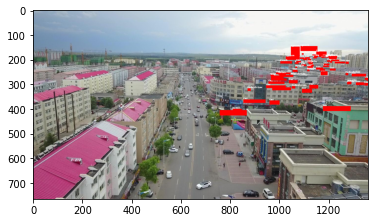

In [ ]:
random.seed(0)
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),(255, 0, 0))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


print(annotation_file)

#Get the corresponding image file
image_file = annotation_file.replace("txtannotations", "images").replace("txt", "jpg")

print(image_file)

assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/txtannotations/9999955_00000_d_0000256.txt
/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/images/9999955_00000_d_0000256.jpg


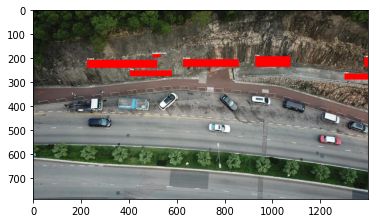

In [ ]:
random.seed(0)
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),(255, 0, 0))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


print(annotation_file)

#Get the corresponding image file
image_file = annotation_file.replace("txtannotations", "images").replace("txt", "jpg")

print(image_file)

assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
cat /content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-train/txtannotations/9999955_00000_d_0000256.txt


1 0.369 0.242 0.024 0.015
6 0.266 0.285 0.208 0.041
6 0.531 0.280 0.166 0.039
5 0.352 0.335 0.124 0.029
5 0.716 0.273 0.104 0.055
5 1.205 0.270 0.108 0.029
5 1.383 0.286 0.115 0.041
5 1.577 0.322 0.096 0.034
5 1.726 0.350 0.102 0.036
4 1.576 0.386 0.115 0.031
4 0.989 0.352 0.117 0.030
4 1.037 0.275 0.095 0.050


In [ ]:
class_name_to_id_mapping = {"Ignore":0,
                            "Pedestrian":1,
                            "People":2,
                            "Bicycle":3,
                            "Car":4,
                            "Van":5,
                            "Truck":6,
                            "Tricycle":7,
                            "Awning-tricycle":8,
                            "Bus":9,
                            "Motor":10,
                            "Others":11
                           }

/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/txtannotations/9999941_00000_d_0000021.txt
/content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/images/9999941_00000_d_0000021.jpg


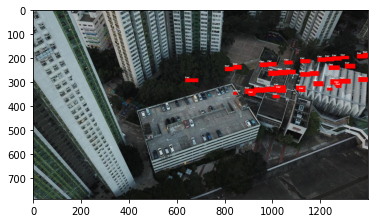

In [ ]:
random.seed(0)
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),(255, 0, 0))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


print(annotation_file)

#Get the corresponding image file
image_file = annotation_file.replace("txtannotations", "images").replace("txt", "jpg")

print(image_file)

assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
cat /content/drive/MyDrive/VisDrone2019-DET/VisDrone2019-DET-test-dev/VisDrone-test-dev/txtannotations/9999941_00000_d_0000021.txt

1 1.742 0.159 0.010 0.005
4 0.586 0.312 0.025 0.021
4 0.610 0.303 0.025 0.023
4 0.690 0.290 0.027 0.023
4 0.714 0.287 0.027 0.022
4 0.763 0.278 0.024 0.019
4 0.813 0.271 0.030 0.021
4 0.862 0.263 0.025 0.021
4 0.886 0.260 0.027 0.021
4 0.907 0.256 0.028 0.021
4 0.931 0.251 0.024 0.017
4 0.982 0.245 0.029 0.021
4 1.000 0.240 0.030 0.024
4 1.024 0.236 0.028 0.024
4 1.164 0.334 0.034 0.022
4 1.141 0.339 0.033 0.021
4 0.987 0.368 0.030 0.024
4 0.932 0.377 0.032 0.025
4 0.905 0.381 0.034 0.026
4 0.852 0.390 0.029 0.025
4 0.840 0.336 0.028 0.024
4 0.813 0.341 0.029 0.023
4 0.737 0.414 0.034 0.029
4 0.709 0.420 0.029 0.026
4 0.677 0.424 0.034 0.027
4 0.649 0.430 0.032 0.027
4 0.718 0.335 0.029 0.026
4 0.746 0.331 0.028 0.026
4 0.770 0.328 0.028 0.024
4 0.899 0.305 0.032 0.022
4 0.947 0.297 0.030 0.025
10 0.603 0.441 0.010 0.014
4 0.474 0.372 0.039 0.019
1 1.557 0.391 0.008 0.006
1 1.563 0.393 0.009 0.006
1 1.626 0.377 0.010 0.005
1 1.635 0.381 0.009 0.006
1 1.388 0.423 0.009 0.006
4 0.741 0.4

TRaining 